In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/Roshan Salunke/Downloads/Data Science Course/train.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = df['label']
x = df.drop('label',axis=1)

In [5]:
y.shape, x.shape

((42000,), (42000, 784))

In [14]:
idx = 8
y[idx]

5

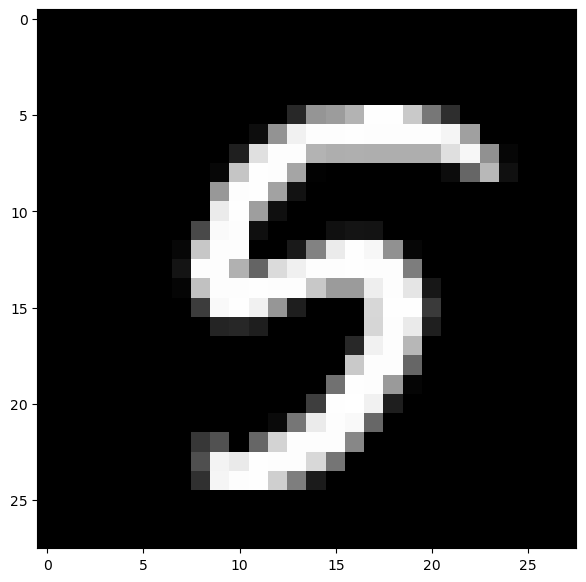

In [15]:
plt.figure(figsize=(7,7))
grid_data = x.loc[idx].values.reshape(28,28)
plt.imshow(grid_data, interpolation='none',cmap='gray')

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scalar = StandardScaler()
scaled_data = scalar.fit_transform(x)

In [18]:
scaled_data.shape

(42000, 784)

In [19]:
sample_data = scaled_data

In [20]:
cover_matrix = np.matmul(sample_data.T, sample_data)

In [21]:
cover_matrix.shape

(784, 784)

In [23]:
from scipy.linalg import eigh

In [24]:
values, vectors = eigh(cover_matrix, eigvals=(782,783))

In [25]:
values.shape

(2,)

In [26]:
vectors.shape

(784, 2)

In [27]:
vectors = vectors.T
vectors.shape

(2, 784)

In [28]:
new_coordinates = np.matmul(vectors, sample_data.T)
new_coordinates.shape

(2, 42000)

In [29]:
new_coordinates = np.vstack((new_coordinates, y)).T
new_coordinates = pd.DataFrame(new_coordinates, columns=["1st_principle", '2nd_principle', 'label'])
new_coordinates.head()

,1st_principle,2nd_principle,label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


C:\Users\Roshan Salunke\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 600x600 with 0 Axes>

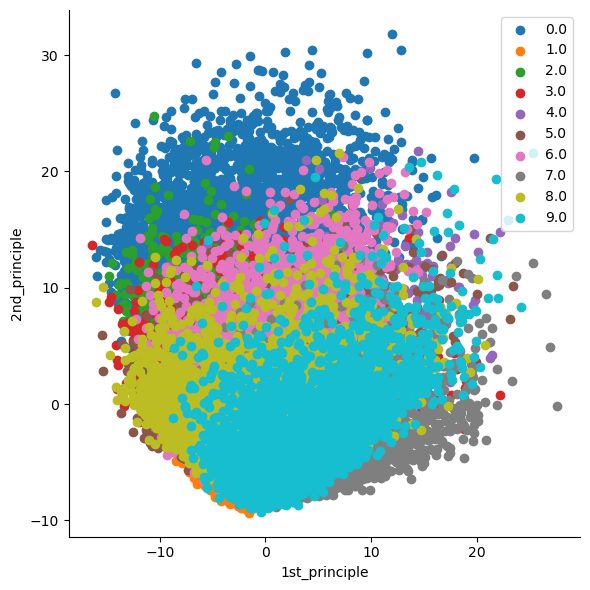

In [35]:
plt.figure(figsize=(6,6))
sns.FacetGrid(new_coordinates, hue='label',size=6).map(plt.scatter, '1st_principle', '2nd_principle')
plt.legend()
plt.show()

In [36]:
from sklearn.decomposition import PCA
pca = PCA()

In [37]:
pca.n_components = 2

In [38]:
pca_data = pca.fit_transform(sample_data)

C:\Users\Roshan Salunke\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


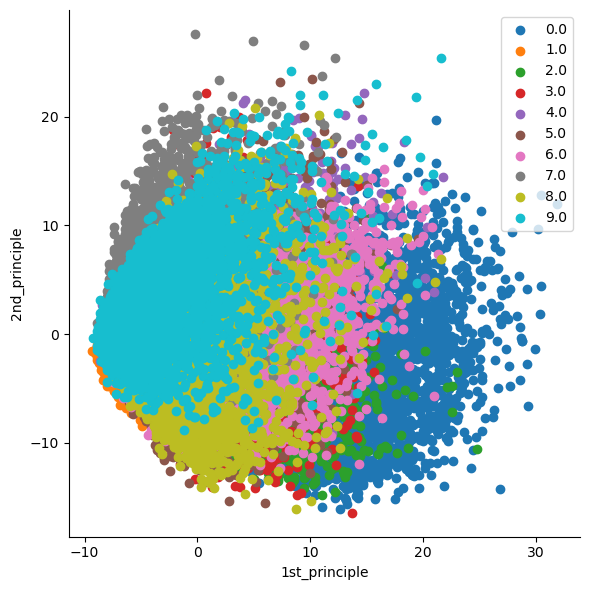

In [39]:
pca_data = np.vstack((pca_data.T, y)).T

pca_df = pd.DataFrame(data=pca_data, columns=('1st_principle', '2nd_principle', 'label'))

sns.FacetGrid(pca_df, hue='label', size=6).map(plt.scatter, '1st_principle', '2nd_principle')
plt.legend()
plt.show()

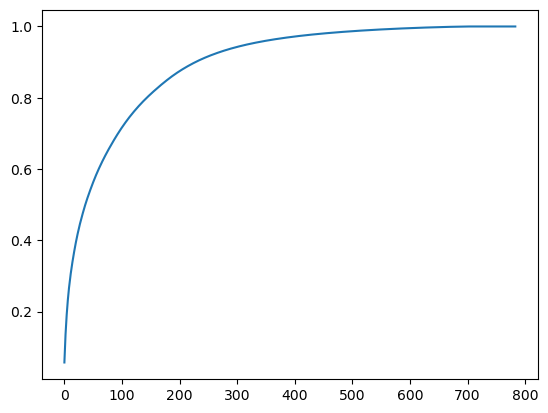

In [43]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)
variance = pca.explained_variance_/sum(pca.explained_variance_)
cumsum = np.cumsum(variance)
plt.plot(cumsum)